<a href="https://colab.research.google.com/github/SaltedTacos/Project-1/blob/main/CM2607_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [3]:
#Question 1a - Working
x,y = sym.symbols('x y')

f = (sym.exp((x**2)+(y**2))+sym.cos(x*y))

f_xdiff = f.diff(x)
f_ydiff = f.diff(y)

In [4]:
#Question 1a - Answer
print("The partial differentiation of x: ")

f_xdiff

The partial differentiation of x: 


2*x*exp(x**2 + y**2) - y*sin(x*y)

In [5]:
#Question 1a - Answer
print("The partial differentiation of y: ")

f_ydiff

The partial differentiation of y: 


-x*sin(x*y) + 2*y*exp(x**2 + y**2)

In [24]:
#Question 1b - working
def calc_GradientVector():

  x_input = input("Enter the value of x: ")
  y_input = input("Enter the value of y: ")

  x_vector = f_xdiff.subs({x: x_input, y: y_input})
  y_vector = f_ydiff.subs({x: x_input, y: y_input})

  x_vector = sym.N(x_vector,4)
  y_vector = sym.N(y_vector,4)

  gradient_vector = [x_vector, y_vector]

  return gradient_vector

In [25]:
#Question 1b - answer
print(calc_GradientVector())

Enter the value of x: 1
Enter the value of y: 2
[295.0, 592.7]


In [ ]:
#Question 1c - working


In [ ]:
#Question 1c - answer

In [ ]:
#Question 1d - working

In [ ]:
#Question 1d - answer

In [26]:
#Question 2a - working
t = sym.Symbol('t')
f = (2*(t**2))*(sym.exp(-t))
f_xintg = sym.integrate(f,(t,0,4))

In [28]:
#Question 2a - answer
f_xintg

4 - 52*exp(-4)

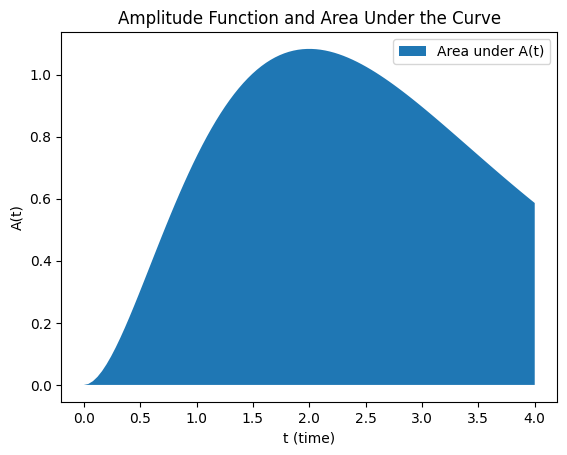

In [35]:
#Question 2b - answer and working
x_values = np.linspace(0,4,100)
y_values = ((2*(x_values**2))*(np.exp(-x_values)))
plt.fill_between(x_values,y_values,label="Area under A(t)")

plt.title("Amplitude Function and Area Under the Curve")
plt.xlabel("t (time)")
plt.ylabel("A(t)")
plt.legend()

plt.show()

In [ ]:
#Question 2c - answer